# COMPREHENSIVE DATA EXPLORATION WITH PYTHON

From: [Here](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook#COMPREHENSIVE-DATA-EXPLORATION-WITH-PYTHON)

### 0. Table of Contents

1. Understand the Problem
2. Univariable Study
3. Multivariate Study
4. Basic Cleaning
5. Test Assumptions

### 1. Understanding the Problem

In [2]:
# import relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# get dataset
df_train = pd.read_csv('train.csv')
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Now that we have our column names, let us try to understand our data.

This project aims to
- Explore the variable influence in 'SalePrice'.

With that, we need to read the decription of every variable and see if we can create a relationship with 'SalePrice'. We can rate each variable from most influencial to least influencial.

After judging every variable, we can filter it and look carefully the most influential of all.

From the Notebook Reference, he conluded the important variable to be:
1. OverallQual: Overall material and finish quality
2. YearBuilt: Original construction date
3. TotalBsmtSF: Total square feet of basement area
4. GrLivArea: Above grade (ground) living area square feet

I would like to add a few more variables.
1. Neighborhood: Physical locations within Ames city limits
2. Condition1: Proximity to main road or railroad



In [4]:
# check each variable's type
df_train[['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','Neighborhood','Condition1']].dtypes

OverallQual      int64
YearBuilt        int64
TotalBsmtSF      int64
GrLivArea        int64
Neighborhood    object
Condition1      object
dtype: object

### 2. Univariate Study

Let us analyze 'SalePrice'

In [7]:
# descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can see that the minimum price is larger than zero. Looking good.

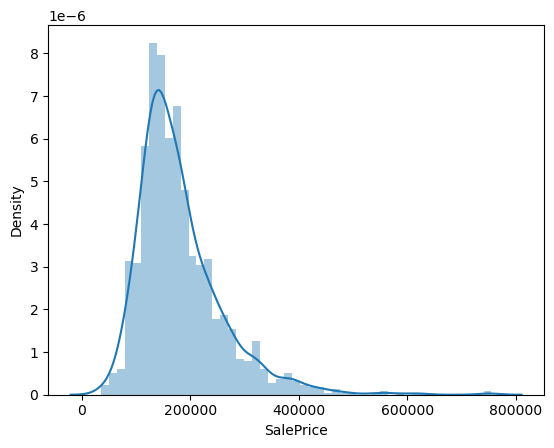

In [9]:
# histogram
sns.distplot(df_train['SalePrice']);

It shows:
1. Deviation from normal distribution
- High standard deviation
2. Have positive skewness
- Tail on the rightside is longer
3. Show peakedness
- Has distinct and higher peak.
4. There are outliers. 
- Which gives the graph a narrow vertical range.

In [10]:
# skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


The data is 
- Positively Skewed
- High Kurtosis (>3)

### 3. Multivariate Study

Relationship of 'SalePrice' with 'Grlivarea'

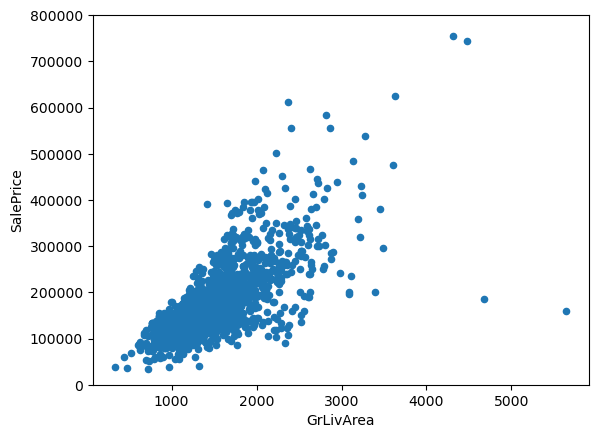

In [13]:
# scatter plot grlivare/saleprice
var = 'GrLivArea'
# concatenate grlivarea and saleprice in a column
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0,800000));

'SalePrice' and 'GrLivArea' has a linear relationship.

Relationship between 'TotalBsmtSF' and 'SalePrice'

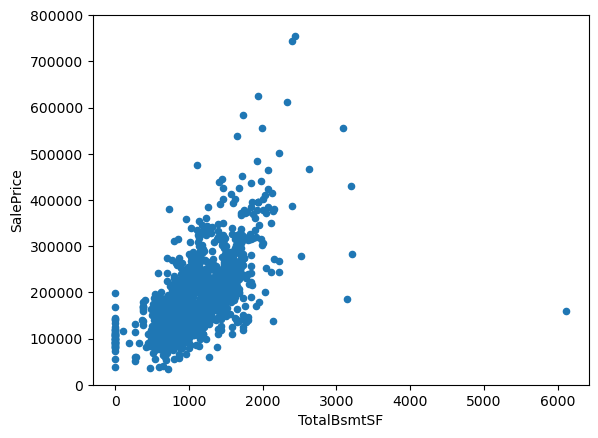

In [16]:
tbsf_sp = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis = 1)
tbsf_sp.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice', ylim = (0, 800000));

They have a positive relationship with each other.

Relationship between 'OverallQual' and 'SalePrice'

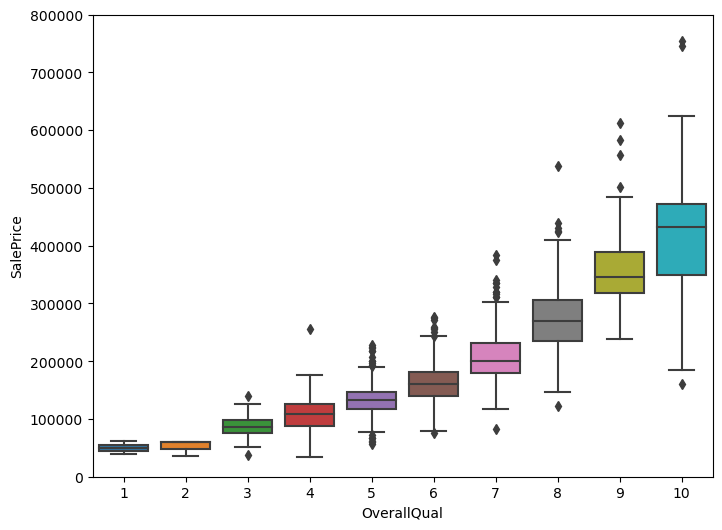

In [27]:
# box plot overallqual/saleprice
oq_sp = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig_oqsp = sns.boxplot(x = 'OverallQual', y = 'SalePrice', data=oq_sp)
fig_oqsp.axis(ymin = 0, ymax = 800000);

SalePrice corresponds with OverallQual directly.

Relationship between 'YearBuilt' and 'SalePrice'

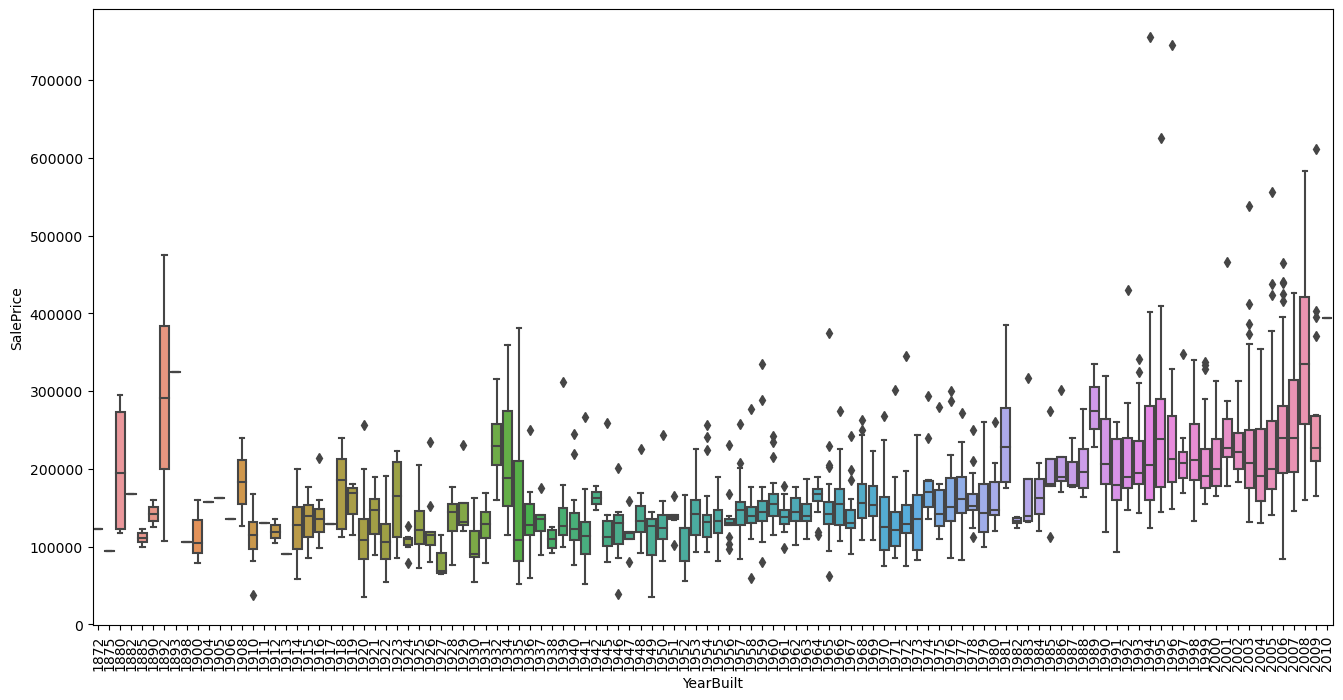

In [29]:
yb_sp = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis = 1)
f, ax = plt.subplots(figsize= (16,8))
fig_ybsp = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = yb_sp)
fig.axis(ymin = 0, ymax = 800000);
plt.xticks(rotation = 90);

Most people spend on newly built houses, but some buy from old ones. 

Now, let us find more variables that contain a relevant relationship with 'SalePrice'.

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

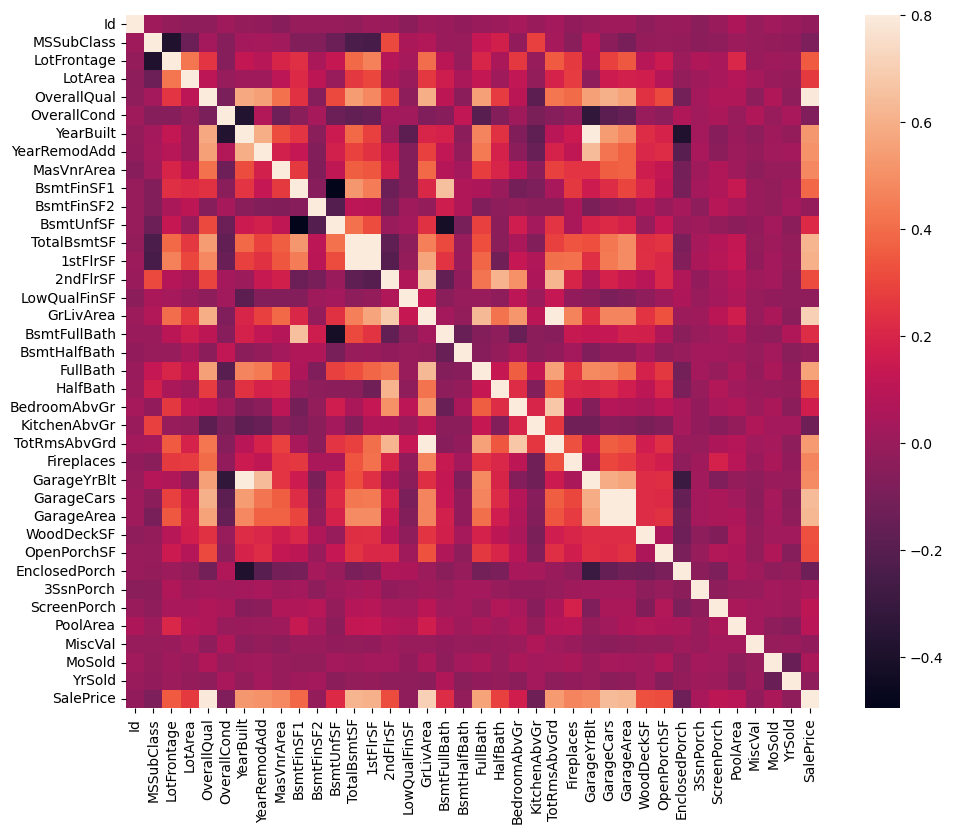

In [34]:
# correlation matrix
corrmat_train = df_train.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat_train, vmax = 0.8, square = True);
print(corrmat_train.sort_values('SalePrice', ascending = False)['SalePrice'])

The lighter the shade, the more correlation it has with its counterpart. We can see the variables with the highest correlation coefficients to be: 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', and 'YearBuilt'. 'YearBuilt' seemed lower than the rest that we examined earlier.

Let us check closely our top 5.

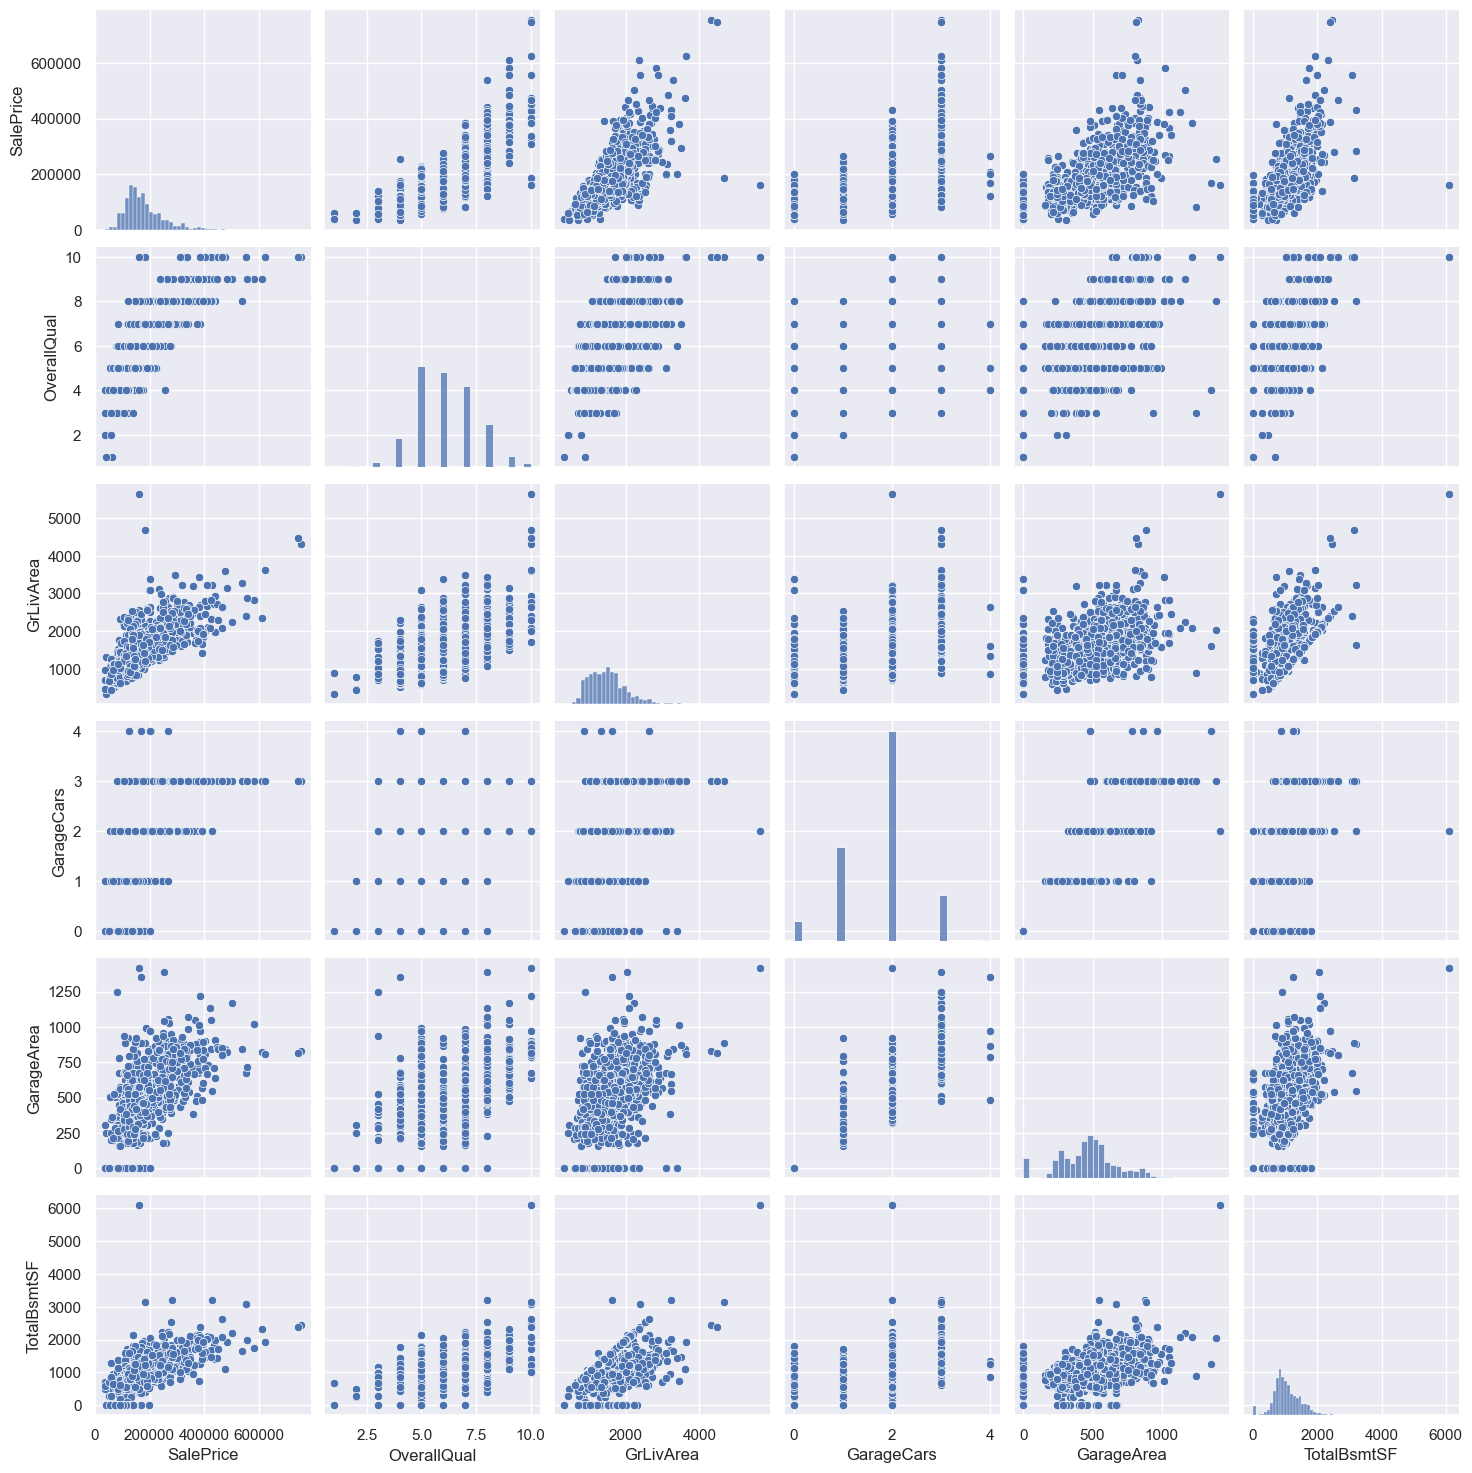

In [36]:
# scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

This main scatter plot gives us an idea about the variable relationship.

The most notable relationship is between 'GrLivArea' and 'TotalBsmtSF' which has a linear relationship with each other. It make sense since the size of your living room must not be larger than your basement, explaining that there are no dots below the patterned line.

### 4. Basic Cleaning

Let us check if the missing data. 

In [42]:
# missing data
total_null = df_train.isnull().sum().sort_values(ascending = False)
percent_null = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null Values', 'Percent Null'])
missing_data.head(20)

,Total Null Values,Percent Null
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


All of the variables with missing data seems irrelevant with our observations earlier. To handle the missing data, let us delete all the variables with missing data.

In [90]:
df_train = df_train.drop((missing_data[missing_data['Total Null Values']>1]).index,1)df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().sort_values(ascending = False).head(20)

Id              0
Fireplaces      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
GarageCars      0
CentralAir      0
GarageArea      0
PavedDrive      0
WoodDeckSF      0
dtype: int64

Let us try to analyze and remove our outliers.

Let us standardize the data by converting data values to have a mean of 0 and a standard deviation of 1

In [10]:
# standardizing data 
# standardscaler() function to standardize the data values into a standard format
# fit_transform to transform the data and standardize it
# df_train['SalePrice'] has one dimension, use [:,np.newaxis] as index of the array to transform 1D array ito a column matrix (one column, multiple rows)
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
# argsort returns index by ascending values, low_range gives first 10 
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)


outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


- Low range values are similar and not to far from 0
- High range values are far from 0. There is even a 7.

Bivariate analysis
- Let us check our scatter plots and try to remove the outliers from there.

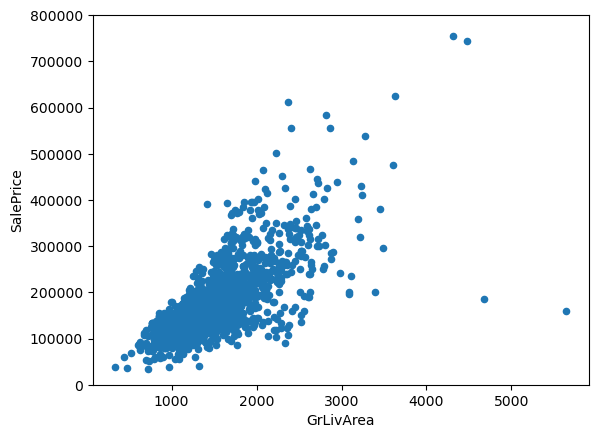

In [11]:
# bivariate analysis saleprice/grlivearea
var = 'GrLivArea'
# concatenate grlivarea and saleprice in a column
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0,800000));

- The two values on the lower right of the scatter plot seems to deviate from the mean. We'll assume this is an outlier and remove them.
- The two values on the upper right maybe far but seems to follow the trend line. We'll not assume them as an outlier.

In [15]:
# deleting the two points, highest GrLivArea
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

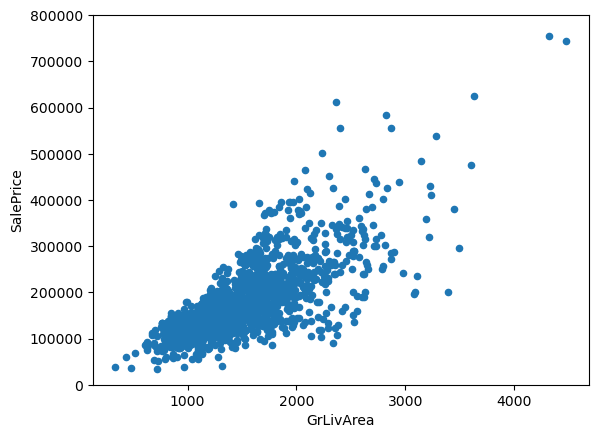

In [16]:
# running this again: bivariate analysis saleprice/grlivearea
var = 'GrLivArea'
# concatenate grlivarea and saleprice in a column
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0,800000));

Looks good

### 5. Test Assumptions

According to Hair et al. (2013), four assumptions should be tested:

- Normality
- Homoscedasticity
- Linearity
- Absence of correlated errors

Checking Normality
- the data should look like the normal distribution
- by Histogram
- Normal probability plot

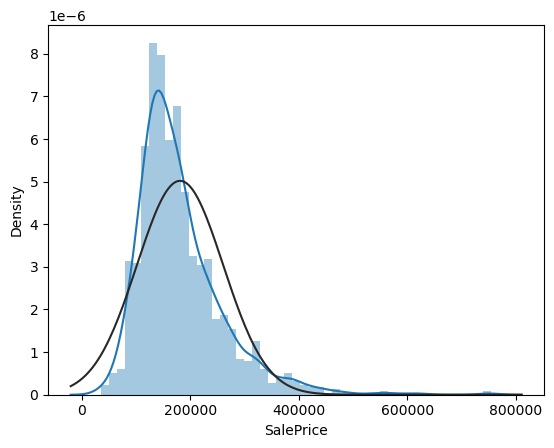

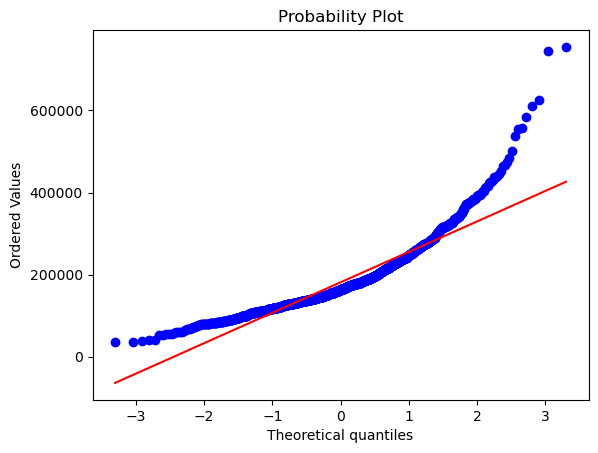

In [17]:
# histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

'SalePrice' is not normal.
- Showed peakedness
- positive skewness
- not follow the diagonal line

We need to transform the data.

In [18]:
# applying log transformation
# log transformation transform skewed data to approx conform to normality
df_train['SalePrice'] = np.log(df_train['SalePrice'])

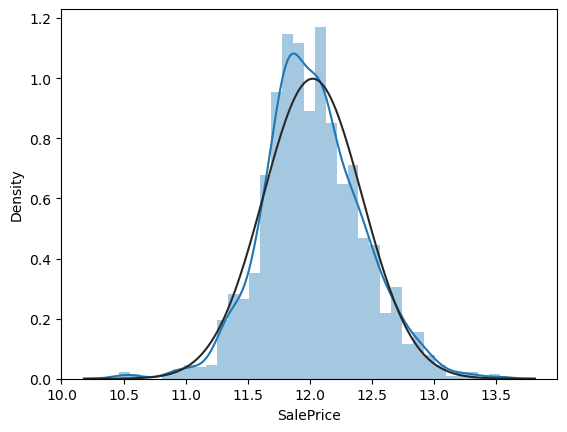

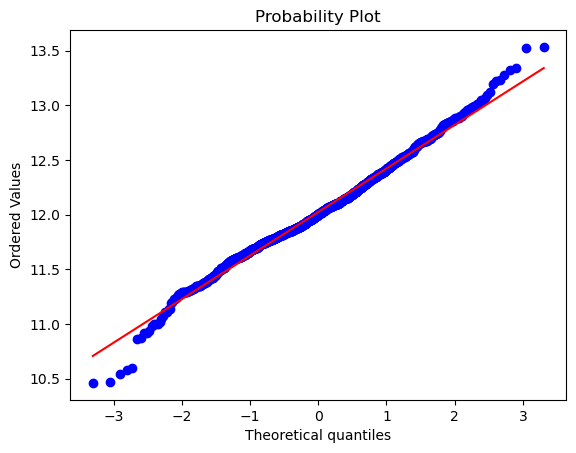

In [19]:
# transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

Looks good

Apply with 'GrLivArea'

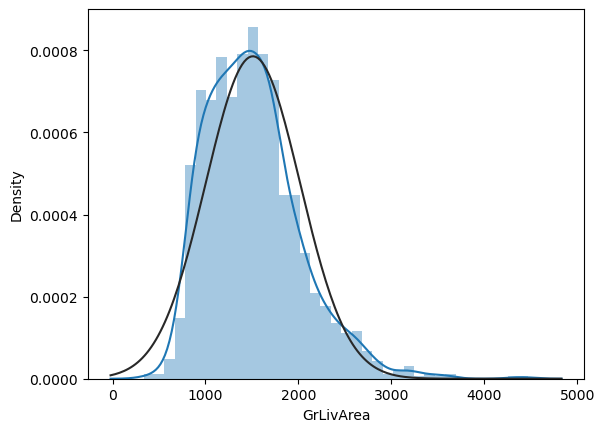

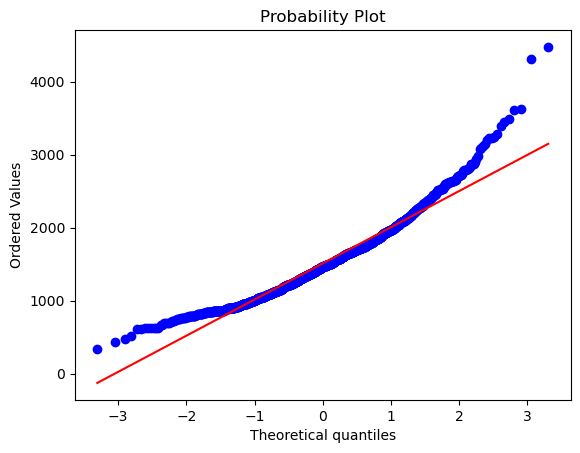

In [20]:
# histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

'GrLivArea' is not normal
- positive skewness
- not following diagonal line

Transforming...

In [21]:
# applying log transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

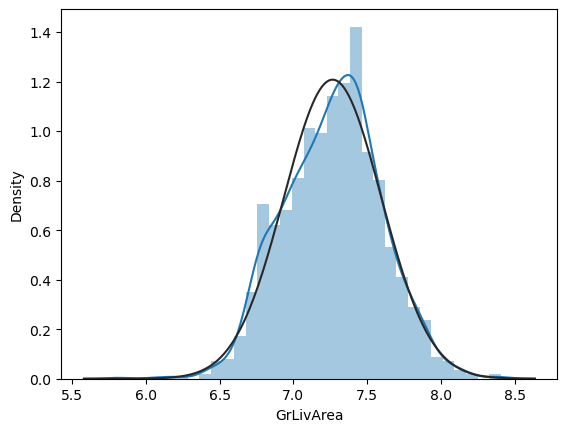

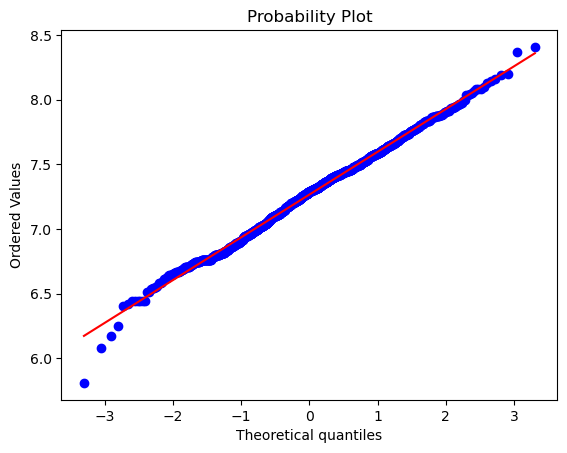

In [22]:
# transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

Looks good

Apply with 'TotalBsmtSF'

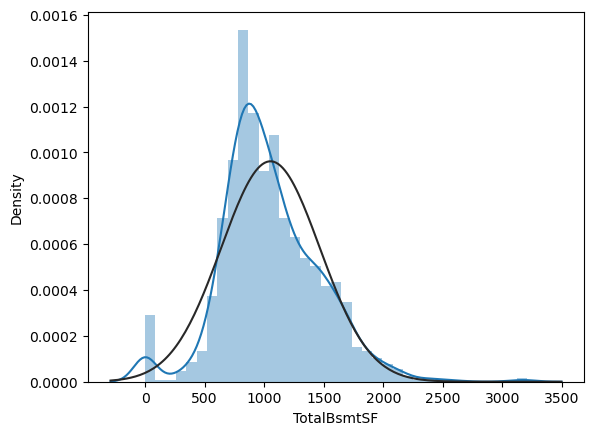

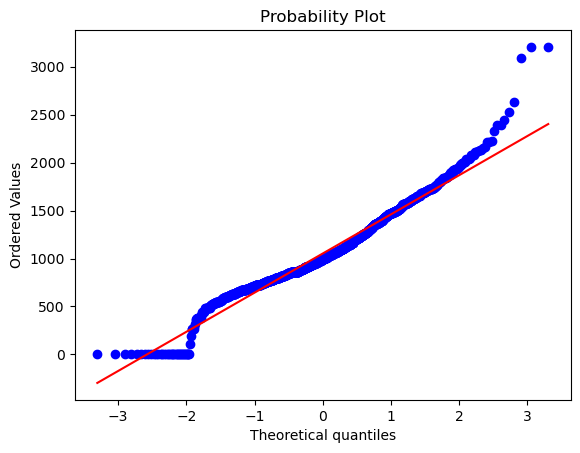

In [23]:
# histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

There is a value zero. We cannot do log transformations.

To apply log transformation, we need to create a variable that can get the effect of having or not having a basement.
Then, we'll do log transform to all non-zero data. 

In [26]:
# create column for new variable
# if area > 0: x = 1, area = 0: x = 0
# shown below 
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)
# 0 muna lahat
df_train['HasBsmt'] = 0
# 1 ung mga hindi 0 ang area
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [25]:
pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)

0       1458
1       1458
2       1458
3       1458
4       1458
        ... 
1455    1458
1456    1458
1457    1458
1458    1458
1459    1458
Length: 1458, dtype: int64

In [27]:
# transforming data
# log transform only with > 0 TotalBsmtSF
df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

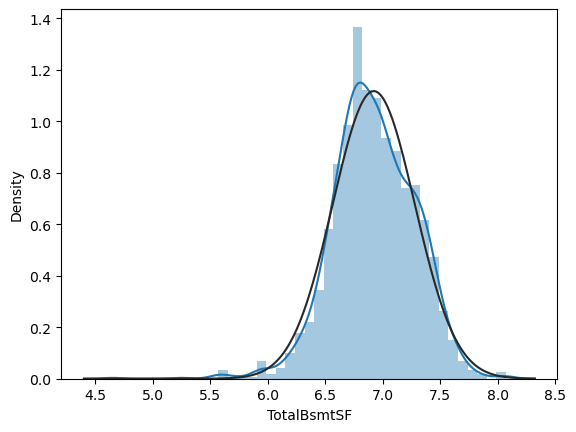

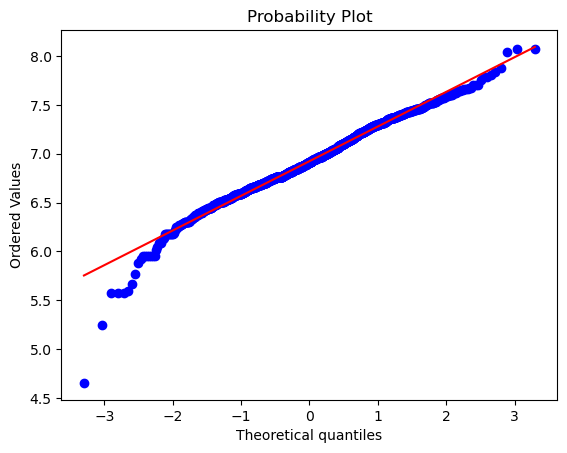

In [28]:
# transformed histogram and normal probability plot
# show > 0  and overall
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot = plt)

Looks Good

Checking Homoscedasticity
- assumption that dependent variable exhibit equal levels of variance across the range of predictor variables.
- We want homoscedasticity because we want the error term to be the same across all values of the independent variables.


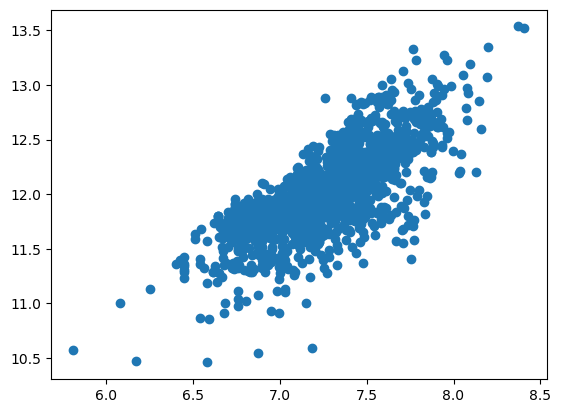

In [29]:
# scatter plot of grlivavrea/saleprice
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

The scatter plot now does not have a conic shape anymore, thanks to normality. We can say that it is homoscedastic.

Checking 'SalePrice' with 'TotalBsmtSF'

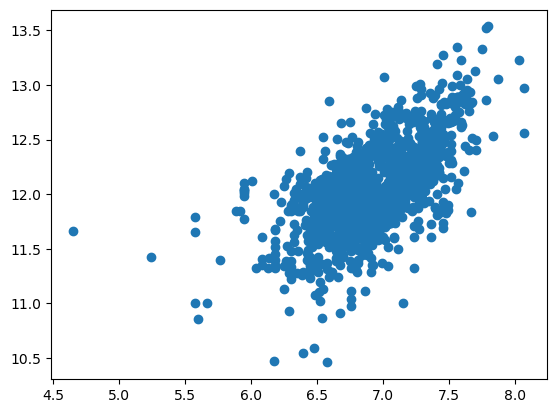

In [30]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);


Dummy Variables

In [31]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

### 6. Summary

In this notebook, we examined "SalePrice" and its most linked factors in this notebook. Additionally, we examined some of the core statistical hypotheses, dealt with missing data and outliers, and converted categorical variables into dummy variables. 